In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import codecs

In [3]:
#test_csv_path = 'Data/dataTemp/output_review_yelpHotelData_NRYRcleaned.csv'
test_csv_path2 = '../Data/YelpChi/output_review_yelpResData_NRYRcleaned.txt'
#df_yelpchi1 = pd.read_csv(test_csv_path, sep='delimiter', header=None)
df_yelpchi2 = pd.read_csv(test_csv_path2, sep='delimiter', header=None)

In [5]:
print(df_yelpchi2.tail(10))

                                                       0
61531  I went to a party at this bar & grill yesterda...
61532  I love me some Cafezazzo! I come here a few ti...
61533  So after all these years I decided to check ou...
61534  I truly love this place! Just like everyone st...
61535  If you want seafood this is place to go. It is...
61536  I've passed this place a bunch of times on my ...
61537  Rubino's is not really setup as a retail opera...
61538  This place is amazing. The food is great and y...
61539  OK went back the next day as I was driving by ...
61540  Delicious, rather authentic Mexican food, must...


In [7]:
sample = df_yelpchi2[0]

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
swords = set(stopwords.words("english"))
stemmer = PorterStemmer()

def parse_text(review):
    clean_review = []
    # text = re.sub("[^a-zA-Z]", ' ', text)
    # text = text.lower().split()
    # text = [w for w in text if w not in swords]
    
    # # Stemming
    # stems = [stemmer.stem(ss) for ss in text]
    for text in review:
        text = re.sub("[^a-zA-Z]", ' ', text)
        text = text.lower().split()
        text = [w for w in text if w not in swords]
        
        # Stemming
        # stems = [stemmer.stem(ss) for ss in text]
        text = " ".join(text)
        clean_review.append(text)
    
    return clean_review

sample = parse_text(sample)

In [10]:
df_clean_big = pd.DataFrame(sample,columns = ['text'])
print(df_clean_big['text'].tail(20))

61521                 man place good even matter get chips
61522    ok get ready totally biased review give el mil...
61523    quite possibly favorite mexican food chicago o...
61524    give place star damn good food damn good price...
61525    lately everything tried menu quite good partic...
61526    problem face every time certain friends visit ...
61527    like san luis speciality alambres kind mexican...
61528    hmmmm ok much white sox land cobblestones gets...
61529    came pm pm start drink alone studying one look...
61530    surprised eagerly roped pop trivia game upon w...
61531    went party bar grill yesterday pleasant surpri...
61532    love cafezazzo come times around year kids som...
61533    years decided check cafezazzo neighborhood gla...
61534    truly love place like everyone states reviews ...
61535    want seafood place go warehouse man help nice ...
61536    passed place bunch times way olympic northwest...
61537    rubino really setup retail operation prices in.

In [12]:
### MENGINPUT METADATA

df_meta2 = pd.read_csv("../Data/YelpChi/output_meta_yelpResData_NRYRcleaned.txt", sep=' ', header=None
    , names=['date','review_id','reviewer_id','product_id','label','useful_count','funny_count','cool_count'
    ,'star_rating'])
print(df_meta2.shape)

df_meta2['label'] = df_meta2['label'].replace({'N': 0, 'Y': 1})
df_meta2
# df_meta['label'] = df_meta['label'].replace({'N': 0, 'Y': 1})


(61541, 9)


,date,review_id,reviewer_id,product_id,label,useful_count,funny_count,cool_count,star_rating
0,9/22/2012,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,0,0,0,0,5
1,9/22/2012,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,0,0,0,0,5
2,9/19/2012,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,0,0,0,2,3
3,9/6/2012,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,0,3,0,8,3
4,9/9/2012,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,0,0,2,1,5
...,...,...,...,...,...,...,...,...,...
61536,4/7/2012,I6pazvTPUqRtU,fUXNHG4x1AN9oPpBSpCtUw,_KI0Y2UO68kJuTFUKucaXQ,0,1,0,0,5
61537,6/5/2009,gu7FbL,QQCm2oqSnnz24Z-yHeMtxQ,_KI0Y2UO68kJuTFUKucaXQ,0,0,1,1,4
61538,5/6/2012,hLwn6zw,OXRKydSyzC35n2fNUnbopg,XvP-kanjF6SpchosRk0N5g,0,0,0,0,5
61539,1/8/2011,KEkOzeO9YJ,NE8ULc362aFvnkTDgvZbcA,XvP-kanjF6SpchosRk0N5g,0,0,1,2,2


In [13]:
import tensorflow
from tensorflow.keras.utils import to_categorical
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Activation, Dropout, LSTM, Flatten, Input, concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, BatchNormalization

from sklearn.model_selection import train_test_split


0    53400
1     8141
Name: label, dtype: int64

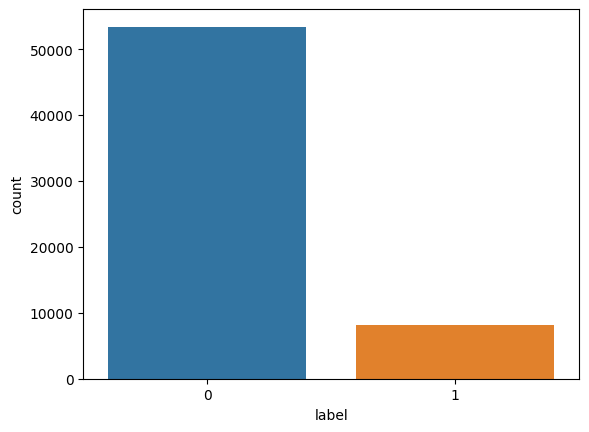

In [15]:
#variable of genuine (o) or fake (1)
sns.countplot(x='label', data=df_meta2)
df_meta2['label'].value_counts()
# df_label_merged.tail(10)

In [17]:
# RANDOM UNDERSAMPLING
def sampling(text,label):
    df_temp = text
    df_temp['label'] = label #df_meta['label']
    minority_class = len(df_temp[df_temp['label'] == 1])
    minority_class_idx = df_temp[df_temp['label'] == 1].index
    mayority_class_idx = df_temp[df_temp['label'] == 0].index
    random_majority_idx = np.random.choice(mayority_class_idx,minority_class,replace=False)
    under_sample_idx = np.concatenate([minority_class_idx,random_majority_idx])
    under_sample = df_temp.loc[under_sample_idx]
    print(under_sample['label'].value_counts())
    return under_sample

# original_sample = df_clean df_meta['label']
#under_sampling_small = sampling(df_clean,df_meta['label'])
under_sampling_res = sampling(df_clean_big,df_meta2['label'])

1    8141
0    8141
Name: label, dtype: int64


<AxesSubplot: xlabel='label', ylabel='count'>

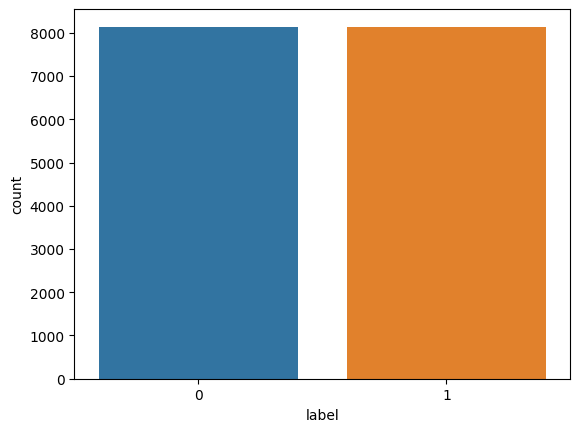

In [21]:
sns.countplot(x='label', data=under_sampling_res)

In [14]:
# # Sampling method experiment
# from imblearn.over_sampling import RandomOverSampler, SMOTE
# from imblearn.under_sampling import RandomUnderSampler, NearMiss
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [15]:
# ### PRE-PROCESS TAHAP 3-TOKENISASI

# tfidf_vectorizer = TfidfVectorizer(tokenizer=parse_text)
# # tf_len = len(tfidf_vectorizer.vocabulary_)
# X_review_tfidf = tfidf_vectorizer.fit_transform(sample)
# # X_review_tfidf.reshape(X_review_tfidf.shape[0], X_review_tfidf.shape[1],1)
# # test_tweets_tfidf = tfidf_vectorizer.transform(test['tweet'])
# print(X_review_tfidf.shape)

In [23]:
### PRE-PROCESS TAHAP 3-TOKENISASI
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras. preprocessing.sequence import pad_sequences
review_text_many = under_sampling_res['text'].to_list()
review_text_ori = df_clean_big['text'].to_list()
tokenizer_dict = {}
tokenizer_dict['many'] = Tokenizer()
tokenizer_dict['many'].fit_on_texts(review_text_many)
tokenizer_dict['ori'] = Tokenizer()
tokenizer_dict['ori'].fit_on_texts(review_text_ori)

In [24]:
encode_text_many = tokenizer_dict['many'].texts_to_sequences(review_text_many)
encode_text_ori = tokenizer_dict['ori'].texts_to_sequences(review_text_ori)

In [31]:
print(encode_text_many[1])

[59, 370, 15, 375, 15, 584, 5, 2873, 1341, 222, 368, 9635, 902, 142, 380, 1703, 138, 713, 7985, 2332, 15, 403, 455, 7986, 1025, 1261, 2332, 177, 916, 705, 1851, 1497, 4101, 829, 1599, 294, 145, 116, 153, 1313, 808, 1055, 689, 17038, 866, 434, 1382, 9636, 2043, 17039, 17040, 4641, 4211, 17041, 2970, 402, 4971, 25, 103, 423, 610, 4972, 17042, 10941, 5, 4972, 10942, 1574, 17043, 1342, 2393, 1342, 2921, 219, 705, 5, 817, 1342, 1343, 2709, 51, 50, 6, 462, 3526, 453, 22, 540, 152, 104, 4211, 185, 169, 558, 492, 105, 195, 41, 289, 1281, 2557, 219, 5, 423, 2557, 466, 331, 644, 825, 745, 165, 32, 92, 10943, 4358, 219, 5, 282, 1654, 1971, 13045, 2971, 1481, 299, 3457, 8716, 64, 412, 535, 2970, 208, 74, 99, 219, 5, 262, 872, 3769, 1600, 6497, 100, 578, 74, 457, 949, 469, 206, 1629, 493, 29, 3185, 821, 15, 8717, 412, 1013, 139, 435, 3186, 940, 100, 24, 92, 53, 3876, 2777, 17044, 4642, 4359, 4, 745, 77, 927, 593, 8718, 1093, 555, 92, 724, 29, 284, 458, 139, 13046, 17045, 363, 4102, 520, 1616, 1440,

In [18]:
# # Near-Miss Under Sampling
# nmiss = RandomOverSampler(random_state=42)
# under_text, under_label = nmiss.fit_resample(X_review_tfidf,df_meta['label'])

In [34]:
genuine_fake_many = to_categorical(under_sampling_res['label'])
genuine_fake_ori = to_categorical(df_meta2['label'])
# genuine_fake2 = df_meta2['label']
# genuine_fake = pd.concat([genuine_fake1,genuine_fake2],axis= 0)
print(genuine_fake_ori)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [38]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(encode_text_many,genuine_fake_many, random_state=0, test_size=0.10, stratify=genuine_fake_many)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2,y_train2, random_state=0, test_size=0.10)

In [39]:
vocab_many = len(tokenizer_dict['many'].index_word)+1
# vocab_ori = len(tokenizer_dict['ori'].index_word)+1
max_kata = 131
X_train2 = pad_sequences(X_train2, maxlen=max_kata, padding='post' )
X_test2 = pad_sequences(X_test2, maxlen=max_kata, padding='post' )
X_val2 = pad_sequences(X_val2, maxlen=max_kata, padding='post' )
# X_train3 = pad_sequences(X_train3, maxlen=max_kata, padding='post' )
# X_test3 = pad_sequences(X_test3, maxlen=max_kata, padding='post' )

In [41]:
print(vocab_many)

30350


In [42]:
print(X_train2.shape,X_test2.shape,y_train2.shape,y_test2.shape)

(13187, 131) (1629, 131) (13187, 2) (1629, 2)


In [43]:
from gensim.models import KeyedVectors

In [45]:
word2vec = KeyedVectors.load_word2vec_format("../Data/GoogleNews-vectors-negative300.bin", binary=True)

In [26]:
# # Testing Some Simliarities 
# w2 = 'love'
# word2vec.most_similar_cosmul(positive=w2)

In [46]:
# Word Embedding
def make_embedding(unique_word,text):
    embedding_dim = 300
    matrix = np.zeros((unique_word+1, embedding_dim)) 
    for word, i in text:
        if word in word2vec.index_to_key:
            matrix[i] = word2vec[word]
    
    print('Null word embeddings: %d' % np.sum(np.sum(matrix, axis=1) == 0))
    return matrix

#embedding_matrix_few = make_embedding(vocab_few,tokenizer_dict['few'].word_index.items())
embedding_matrix_many = make_embedding(vocab_many,tokenizer_dict['many'].word_index.items())
# embedding_matrix_ori = make_embedding(vocab_ori,tokenizer_dict['ori'].word_index.items())

Null word embeddings: 6243


In [30]:
# #cleansing lexicon
# def clean_key(key):
#     cleaned_key = key.strip().lower()  # remove whitespace and convert to lowercase
#     cleaned_key = re.sub('[^a-z0-9]+', '', cleaned_key)  # remove non-alphanumeric characters
#     return cleaned_key

# for key in list(senticnet.keys()):
#     cleaned_key = clean_key(key)
#     if cleaned_key != key:
#         senticnet[cleaned_key] = senticnet.pop(key)

In [47]:
from senticnet4 import senticnet4

senticnet = senticnet4.senticnet
#mengambil hanya nilai polaritinya saja
for key in senticnet:
    senticnet[key] = senticnet[key][:4]

In [33]:
# lexicon_matrix = np.zeros((vocab+1, 4))

# for word, i in token.word_index.items():      
#     if word in senticnet:
#         lexicon_matrix[i] = senticnet.get(word)
        
# print('Null word embeddings: %d' % np.sum(np.sum(lexicon_matrix, axis=1) == 0))

In [48]:
def make_lex_embedding(unique_word,text):
    embedding_dim = 4
    matrix = np.zeros((unique_word+1, embedding_dim)) 
    for word, i in text:
        if word in senticnet:
            matrix[i] = senticnet.get(word)
    
    print('Null word embeddings: %d' % np.sum(np.sum(matrix, axis=1) == 0))
    return matrix


# lexicon_matrix_few = make_lex_embedding(vocab_few,tokenizer_dict['few'].word_index.items())
lexicon_matrix_many = make_lex_embedding(vocab_many,tokenizer_dict['many'].word_index.items())
# lexicon_matrix_ori = make_lex_embedding(vocab_ori,tokenizer_dict['ori'].word_index.items())

Null word embeddings: 21706


In [50]:
dfae = pd.DataFrame(lexicon_matrix_many)
dfae.head(30)

,0,1,2,3
0,0.000,0.000,0.000,0.000
1,0.040,0.000,0.000,0.067
2,0.035,0.000,0.000,0.092
3,0.526,-0.560,0.000,0.903
4,0.905,0.773,0.000,0.892
5,0.000,0.000,0.000,0.000
6,-0.610,0.000,0.856,-0.820
7,-0.780,0.000,0.000,-0.880
8,0.805,-0.920,0.000,0.794
9,0.920,-0.880,0.000,0.695


In [51]:
print(embedding_matrix_many.shape)
print(lexicon_matrix_many.shape)

(30351, 300)
(30351, 4)


In [52]:
#naive concatenation, mengkonkat kedua feature tanpa prerlakuan khusus
def naive_concatenation(word2vec_features, lexicon_features):
    return np.concatenate((word2vec_features, lexicon_features), axis=1)

# concatenated_few = naive_concatenation(embedding_matrix_few,lexicon_matrix_few)
concatenated_many = naive_concatenation(embedding_matrix_many,lexicon_matrix_many)
# concatenated_ori = naive_concatenation(embedding_matrix_ori,lexicon_matrix_ori)

In [53]:
#multichannel dimana feature dengan dimensi terkecil(lexicon) akan mempadding dirinya agar bisa seimbang dalam pemisahan di channel model
def concatenate_features(x, x_lex):
    w2vdim = x.shape[1]
    lexdim = x_lex.shape[1]
    npad = ((0, 0), (0, w2vdim - lexdim))

    x_lex_padded = np.pad(x_lex, pad_width=npad, mode='constant', constant_values=0)
    x_fat = np.concatenate((x[..., np.newaxis], x_lex_padded[..., np.newaxis]), axis=2)

    return x_lex_padded

# multichannel_few = concatenate_features(embedding_matrix_few,lexicon_matrix_few)
multichannel_many = concatenate_features(embedding_matrix_many,lexicon_matrix_many)
# multichannel_ori = concatenate_features(embedding_matrix_ori,lexicon_matrix_ori)

#seleksi fitur word embedding glove
embedding_dictionary = dict()
#glove_file = open('C:\Users\Sayang\Documents\code skripsi\dataTemp\Glove.6B.100d.txt', encoding='utf8')
glove_file = open('C:\glove.6B.100d.txt', encoding='utf8')

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embedding_dictionary [word] = vector_dimensions
glove_file.close()

from numpy import zeros

embedding_matrix = zeros((vocab, 100))
for word, index in token.word_index.items(): #index_word
    embedding_vector = embedding_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def generate_model_report(y_actual,y_prediction):
    akurasi = accuracy_score(y_actual,y_prediction)
    recall = recall_score(y_actual,y_prediction)
    presisi = precision_score(y_actual,y_prediction)
    f1 = f1_score(y_actual,y_prediction)
    auc = roc_auc_score(y_actual, y_prediction)
    # print("Akurasi : ", akurasi)
    # print("Recall : ", recall)
    # print("Presisi : ", presisi)
    # print("F1-Score : ",f1)
    return akurasi, recall, presisi, f1, auc

In [61]:
def cnn_base(embedding_layer,output_dim,input_dim):
    input_word = Input(shape=(max_kata,))
    embed_word = Embedding(input_dim= input_dim, output_dim=output_dim, weights=embedding_layer, input_length=max_kata, trainable = False)(input_word)
    # define the convolution layer
    # concatenated = concatenate([embed_word, embed_lex], axis=-1)
    x = Conv1D(64, kernel_size=3, activation='relu')(embed_word)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(128, kernel_size=3, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.5)(x)
    # flatten the output
    x = GlobalMaxPooling1D()(x)
    # define the output layer
    output_tensor = Dense(2, activation='sigmoid')(x)
    model = Model(input_word, outputs=output_tensor)
    model.compile(optimizer='adam',  loss="binary_crossentropy", metrics=['accuracy'])
    return model

model_base = cnn_base(None,300,vocab_many)
model_base.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 131)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 131, 300)          9105000   
                                                                 
 conv1d_2 (Conv1D)           (None, 129, 64)           57664     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 64, 64)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 62, 128)           24704     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 31, 128)          0         
 1D)                                                       

In [59]:
X_val2 = pad_sequences(X_val2, maxlen=max_kata, padding='post' )

In [62]:
# model_base.compile(optimizer='adam',  loss="binary_crossentropy", metrics=['accuracy'])
history_base = model_base.fit(X_train2, y_train2, epochs=10,batch_size=16, validation_data=(X_val2,y_val2))

Epoch 1/10
825/825 [==============================] - 46s 54ms/step - loss: 0.6641 - accuracy: 0.6019 - val_loss: 0.6621 - val_accuracy: 0.6085
Epoch 2/10
825/825 [==============================] - 44s 54ms/step - loss: 0.6279 - accuracy: 0.6566 - val_loss: 0.6546 - val_accuracy: 0.6146
Epoch 3/10
825/825 [==============================] - 42s 51ms/step - loss: 0.5920 - accuracy: 0.6900 - val_loss: 0.6397 - val_accuracy: 0.6378
Epoch 4/10
825/825 [==============================] - 66s 80ms/step - loss: 0.5361 - accuracy: 0.7427 - val_loss: 0.6816 - val_accuracy: 0.5982
Epoch 5/10
825/825 [==============================] - 56s 67ms/step - loss: 0.4484 - accuracy: 0.8000 - val_loss: 0.6593 - val_accuracy: 0.6323
Epoch 6/10
825/825 [==============================] - 52s 62ms/step - loss: 0.3232 - accuracy: 0.8681 - val_loss: 0.7421 - val_accuracy: 0.6160
Epoch 7/10
825/825 [==============================] - 48s 58ms/step - loss: 0.2064 - accuracy: 0.9255 - val_loss: 0.8295 - val_accuracy:

In [68]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

eval_base = model_base.evaluate(X_test2, y_test2)
y_pred=model_base.predict(X_test2)
y_pred=np.argmax(y_pred,axis=1)
y_testnp=np.argmax(y_test2,axis=1)
cm1 =confusion_matrix(y_testnp,y_pred)
acc_base, recall_base, preisi_base, f1_base, auc_base = generate_model_report(y_testnp,y_pred)

51/51 [==============================] - 2s 29ms/step


In [64]:
model_naive_c = cnn_base([concatenated_many],concatenated_many.shape[1],vocab_many+1)
model_naive_c.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 131)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 131, 304)          9226704   
                                                                 
 conv1d_4 (Conv1D)           (None, 129, 64)           58432     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 64, 64)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 62, 128)           24704     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 31, 128)          0         
 1D)                                                       

In [65]:
history_naive = model_naive_c.fit(X_train2, y_train2, epochs=10,batch_size=64, validation_data=(X_val2,y_val2))

Epoch 1/10
207/207 [==============================] - 28s 127ms/step - loss: 0.6559 - accuracy: 0.6195 - val_loss: 0.6584 - val_accuracy: 0.6085
Epoch 2/10
207/207 [==============================] - 30s 146ms/step - loss: 0.6256 - accuracy: 0.6597 - val_loss: 0.6402 - val_accuracy: 0.6514
Epoch 3/10
207/207 [==============================] - 32s 153ms/step - loss: 0.6073 - accuracy: 0.6734 - val_loss: 0.6366 - val_accuracy: 0.6583
Epoch 4/10
207/207 [==============================] - 32s 157ms/step - loss: 0.5846 - accuracy: 0.6976 - val_loss: 0.6351 - val_accuracy: 0.6473
Epoch 5/10
207/207 [==============================] - 34s 163ms/step - loss: 0.5556 - accuracy: 0.7193 - val_loss: 0.6327 - val_accuracy: 0.6453
Epoch 6/10
207/207 [==============================] - 34s 165ms/step - loss: 0.5295 - accuracy: 0.7361 - val_loss: 0.6407 - val_accuracy: 0.6385
Epoch 7/10
207/207 [==============================] - 35s 171ms/step - loss: 0.4871 - accuracy: 0.7695 - val_loss: 0.6320 - val_ac

In [69]:
eval_naive = model_naive_c.evaluate(X_test2, y_test2)
y_pred=model_naive_c.predict(X_test2)
y_pred=np.argmax(y_pred,axis=1)
y_testnp=np.argmax(y_test2,axis=1)
cm2 =confusion_matrix(y_testnp,y_pred)
acc_naive, recall_naive, preisi_naive, f1_naive , auc_naive = generate_model_report(y_testnp,y_pred)

51/51 [==============================] - 2s 31ms/step


In [70]:
print(acc_naive, recall_naive, preisi_naive, f1_naive , auc_naive)

0.5930018416206262 0.2907975460122699 0.7360248447204969 0.4168865435356201 0.5931874707948328


In [71]:
def cnn_multichannel(embedding_layer,lexicon_layer,input_dim):
    input_word = Input(shape=(max_kata,))
    embed_word = Embedding(input_dim= input_dim+1, output_dim=embedding_layer.shape[1], weights=[embedding_layer], input_length=max_kata, trainable = False)(input_word)
    embed_lex = Embedding(input_dim= input_dim+1, output_dim=lexicon_layer.shape[1], weights=[lexicon_layer], input_length=max_kata, trainable = False)(input_word)
    # define the convolution layer
    # concatenated = concatenate([embed_word, embed_lex], axis=-1)
    concatenated = concatenate([embed_word, embed_lex], axis=-1)
    x = Conv1D(64, kernel_size=3, activation='relu')(concatenated)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(128, kernel_size=3, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.5)(x)
    # flatten the output
    x = GlobalMaxPooling1D()(x)
    # define the output layer
    output_tensor = Dense(2, activation='sigmoid')(x)
    model = Model(input_word, outputs=output_tensor)
    model.compile(optimizer='adam',  loss="binary_crossentropy", metrics=['accuracy'])
    return model

model_multichannel = cnn_multichannel(embedding_matrix_many,multichannel_many,vocab_many)
model_multichannel.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 131)]        0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 131, 300)     9105300     ['input_4[0][0]']                
                                                                                                  
 embedding_4 (Embedding)        (None, 131, 300)     9105300     ['input_4[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 131, 600)     0           ['embedding_3[0][0]',            
                                                                  'embedding_4[0][0]']      

In [72]:
history_multi = model_multichannel.fit(X_train2, y_train2, epochs=10,batch_size=64, validation_data=(X_val2,y_val2))

Epoch 1/10
207/207 [==============================] - 54s 254ms/step - loss: 0.6582 - accuracy: 0.6161 - val_loss: 0.6598 - val_accuracy: 0.6078
Epoch 2/10
207/207 [==============================] - 55s 266ms/step - loss: 0.6257 - accuracy: 0.6573 - val_loss: 0.6459 - val_accuracy: 0.6303
Epoch 3/10
207/207 [==============================] - 55s 265ms/step - loss: 0.6015 - accuracy: 0.6842 - val_loss: 0.6394 - val_accuracy: 0.6453
Epoch 4/10
207/207 [==============================] - 58s 279ms/step - loss: 0.5851 - accuracy: 0.6954 - val_loss: 0.6526 - val_accuracy: 0.6330
Epoch 5/10
207/207 [==============================] - 56s 270ms/step - loss: 0.5568 - accuracy: 0.7216 - val_loss: 0.6314 - val_accuracy: 0.6508
Epoch 6/10
207/207 [==============================] - 71s 343ms/step - loss: 0.5225 - accuracy: 0.7447 - val_loss: 0.6449 - val_accuracy: 0.6364
Epoch 7/10
207/207 [==============================] - 75s 361ms/step - loss: 0.4856 - accuracy: 0.7709 - val_loss: 0.6484 - val_ac

In [73]:
eval_multi = model_multichannel.evaluate(X_test2, y_test2)
y_pred=model_multichannel.predict(X_test2)
y_pred=np.argmax(y_pred,axis=1)
y_testnp=np.argmax(y_test2,axis=1)
cm3 =confusion_matrix(y_testnp,y_pred)
acc_multi, recall_multi, preisi_multi, f1_multi, auc_multi = generate_model_report(y_testnp,y_pred)

51/51 [==============================] - 4s 72ms/step


In [74]:
def cnn_separated_conv(embedding_layer,lexicon_layer,input_dim):
    input_word = Input(shape=(max_kata,))
    # define the embedding layer
    embed_word = Embedding(input_dim= input_dim+1, output_dim=embedding_layer.shape[1], weights=[embedding_layer], input_length=max_kata, trainable = False)(input_word)
    embed_lex = Embedding(input_dim= input_dim+1, output_dim=lexicon_layer.shape[1], weights=[lexicon_layer], input_length=max_kata, trainable = False)(input_word)

    # make conv layer for embed word
    x1 = Conv1D(64, kernel_size=3, activation='relu')(embed_word)
    x2 = Conv1D(128, kernel_size=3, activation='relu')(embed_word)
    concatenated_1 = concatenate([x1, x2], axis=-1)
    pool1 = MaxPooling1D(pool_size=2)(concatenated_1)
    # make conv layer for embed lex
    x3 = Conv1D(64, kernel_size=3, activation='relu')(embed_lex)
    x4 = Conv1D(128, kernel_size=3, activation='relu')(embed_lex)
    concatenated_2 = concatenate([x3, x4], axis=-1)
    pool2 = MaxPooling1D(pool_size=2)(concatenated_2)
    # combining all seperated conv
    concatenated_3 = concatenate([pool1, pool2], axis=-1)
    x = Dropout(0.5)(concatenated_3)
    x = GlobalMaxPooling1D()(x)
    # x = Dense(128, activation='relu')(x)
    output_tensor = Dense(2, activation='sigmoid')(x)
    model = Model(input_word, outputs=output_tensor)
    model.compile(optimizer='adam',  loss="binary_crossentropy", metrics=['accuracy'])
    return model

model_separated = cnn_separated_conv(embedding_matrix_many,lexicon_matrix_many,vocab_many)
model_separated.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 131)]        0           []                               
                                                                                                  
 embedding_5 (Embedding)        (None, 131, 300)     9105300     ['input_5[0][0]']                
                                                                                                  
 embedding_6 (Embedding)        (None, 131, 4)       121404      ['input_5[0][0]']                
                                                                                                  
 conv1d_8 (Conv1D)              (None, 129, 64)      57664       ['embedding_5[0][0]']            
                                                                                            

In [75]:
history_separated = model_separated.fit(X_train2, y_train2, epochs=10,batch_size=32, validation_data=(X_val2,y_val2))

Epoch 1/10
413/413 [==============================] - 113s 264ms/step - loss: 0.6532 - accuracy: 0.6250 - val_loss: 0.6422 - val_accuracy: 0.6487
Epoch 2/10
413/413 [==============================] - 106s 257ms/step - loss: 0.6093 - accuracy: 0.6735 - val_loss: 0.6386 - val_accuracy: 0.6446
Epoch 3/10
413/413 [==============================] - 109s 264ms/step - loss: 0.5765 - accuracy: 0.6999 - val_loss: 0.6371 - val_accuracy: 0.6385
Epoch 4/10
413/413 [==============================] - 106s 257ms/step - loss: 0.5368 - accuracy: 0.7404 - val_loss: 0.6387 - val_accuracy: 0.6439
Epoch 5/10
413/413 [==============================] - 106s 258ms/step - loss: 0.4862 - accuracy: 0.7730 - val_loss: 0.6589 - val_accuracy: 0.6289
Epoch 6/10
413/413 [==============================] - 108s 261ms/step - loss: 0.4363 - accuracy: 0.8029 - val_loss: 0.6550 - val_accuracy: 0.6317
Epoch 7/10
413/413 [==============================] - 108s 261ms/step - loss: 0.3888 - accuracy: 0.8371 - val_loss: 0.6625 -

In [76]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
eval_seperated = model_separated.evaluate(X_test2, y_test2)
y_pred=model_separated.predict(X_test2)
y_pred=np.argmax(y_pred,axis=1)
y_testnp=np.argmax(y_test2,axis=1)
cm4 =confusion_matrix(y_testnp,y_pred)
acc_seperated, recall_seperated, preisi_seperated, f1_seperated, auc_seperated = generate_model_report(y_testnp,y_pred)

51/51 [==============================] - 6s 117ms/step


In [77]:
print(acc_base, recall_base, preisi_base, f1_base, auc_base)
print(acc_naive, recall_naive, preisi_naive, f1_naive, auc_naive)
print(acc_multi, recall_multi, preisi_multi, f1_multi, auc_multi)
print(acc_seperated, recall_seperated, preisi_seperated, f1_seperated, auc_seperated)

0.6040515653775322 0.49079754601226994 0.6349206349206349 0.5536332179930795 0.6041211317284937
0.5930018416206262 0.2907975460122699 0.7360248447204969 0.4168865435356201 0.5931874707948328
0.6286065070595457 0.4785276073619632 0.6842105263157895 0.5631768953068592 0.628698693115871
0.6482504604051565 0.603680981595092 0.6630727762803235 0.6319845857418113 0.6482778372348925


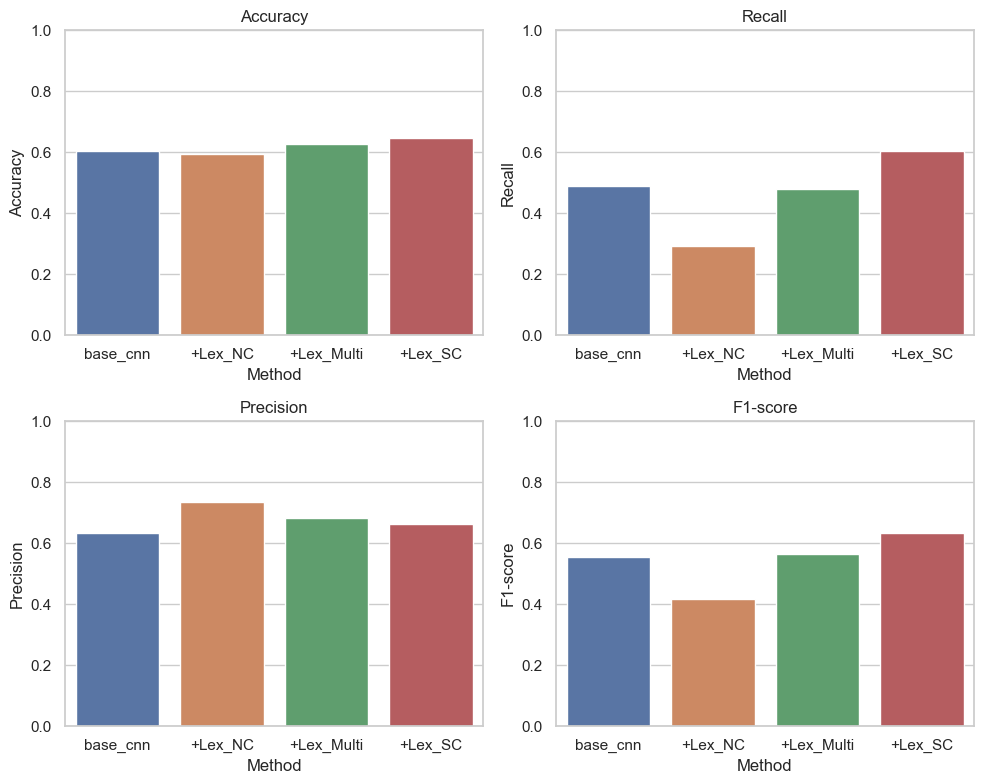

In [78]:
# method_name = ['base_line_CNN','Lex_NC_CNN','Lex_Multi_CNN','Lex_SC_CNN']
# method_value = [[acc_base,recall_base,preisi_base,f1_base],[acc_naive,recall_naive,preisi_naive,f1_naive],[acc_multi,recall_multi,preisi_multi,f1_multi],
#     [acc_seperated,recall_seperated,preisi_seperated,f1_seperated]]
method_name = ['Accuracy','Recall','Precision','F1-score','Method','num']
method_value = [[acc_base,acc_naive,acc_multi,acc_seperated],[recall_base,recall_naive,recall_multi,recall_seperated],[preisi_base,preisi_naive,preisi_multi,preisi_seperated],
    [f1_base,f1_naive,f1_multi,f1_seperated],['base_cnn','+Lex_NC','+Lex_Multi','+Lex_SC'],[1,2,3,4]]

method_result= dict(zip(method_name,method_value))
method_result= pd.DataFrame(method_result)

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot a histogram for each metric
sns.barplot(ax=axes[0, 0], data=method_result, y="Accuracy", x="Method")
sns.barplot(ax=axes[0, 1], data=method_result, y="Recall", x="Method")
sns.barplot(ax=axes[1, 0], data=method_result, y="Precision", x="Method")
sns.barplot(ax=axes[1, 1], data=method_result, y="F1-score", x="Method")

# Set the title for each plot
axes[0, 0].set_title("Accuracy")
axes[0, 0].set_ylim(0,1)
axes[0, 1].set_title("Recall")
axes[0, 1].set_ylim(0,1)
axes[1, 0].set_title("Precision")
axes[1, 0].set_ylim(0,1)
axes[1, 1].set_title("F1-score")
axes[1, 1].set_ylim(0,1)

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()
# # plot histogram for each metric
# for metric in method_result.columns:
#     plt.hist(method_result[metric], alpha=0.5, label=metric)

# plt.legend(loc='upper right')
# plt.show()

In [79]:
def make_plot_hist(m1,m2,m3,m4,train, validation, title):
    graph = plt.subplot(2,2,1)
    graph = plt.plot(m1.history[train],label='train')
    graph = plt.plot(m1.history[validation],label='val')
    graph = plt.subplot(2,2,2)
    graph = plt.plot(m2.history[train],label='train')
    graph = plt.plot(m2.history[validation],label='val')
    graph = plt.subplot(2,2,3)
    graph = plt.plot(m3.history[train],label='train')
    graph = plt.plot(m3.history[validation],label='val')
    graph = plt.subplot(2,2,4)
    graph = plt.plot(m4.history[train],label='train')
    graph = plt.plot(m4.history[validation],label='val')
    plt.legend()
    graph = plt.show()
    return graph

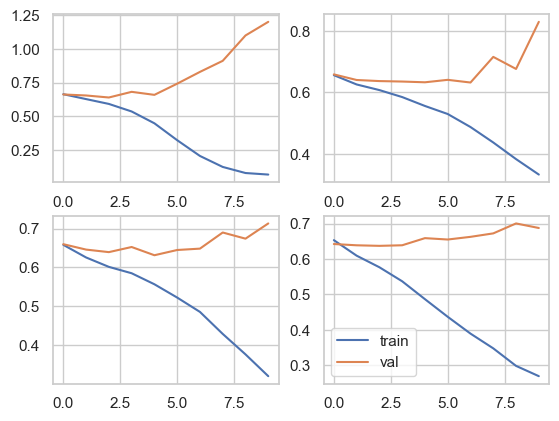

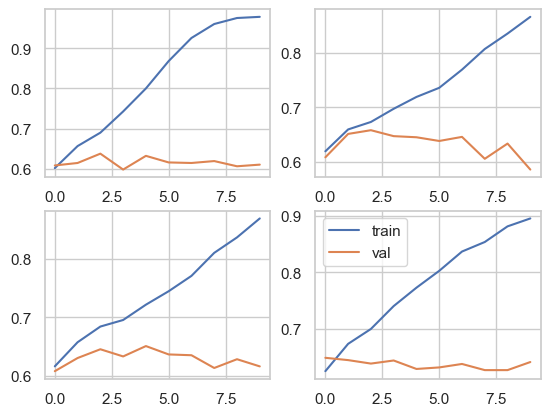

In [80]:
make_plot_hist(history_base,history_naive,history_multi,history_separated,'loss','val_loss','Perubahan loss pada tiap epochs')
make_plot_hist(history_base,history_naive,history_multi,history_separated,'accuracy','val_accuracy','Perubahan akurasi pada tiap epochs')

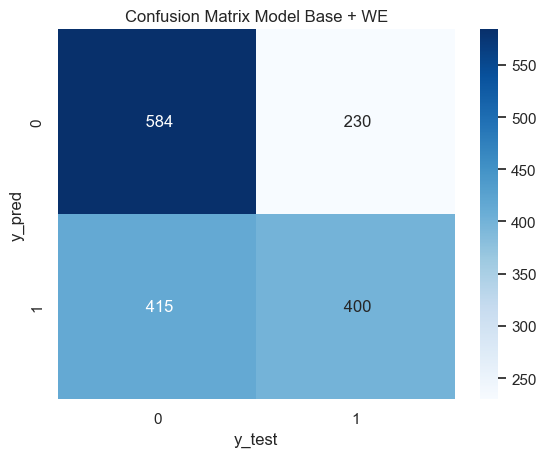

In [81]:
def out_cm(cm,title):
    ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
    ax.set_title(title)
    ax.set_xlabel('y_test')
    ax.set_ylabel('y_pred')

out_cm(cm1,'Confusion Matrix Model Base + WE')

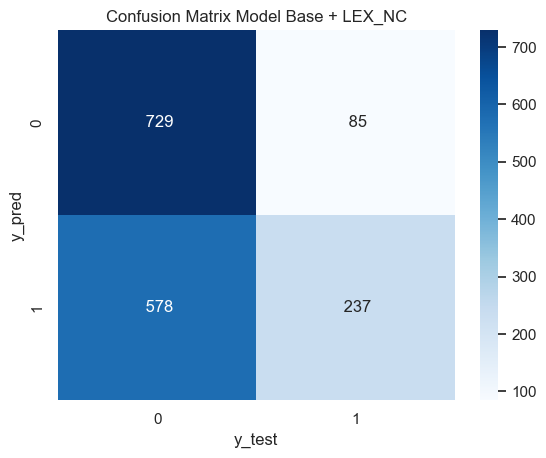

In [82]:
out_cm(cm2,'Confusion Matrix Model Base + LEX_NC')

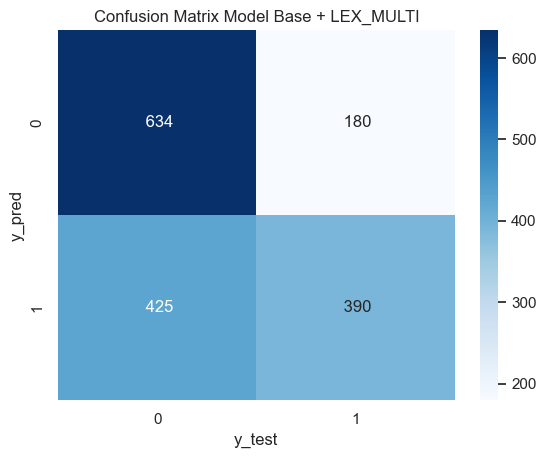

In [83]:
out_cm(cm3,'Confusion Matrix Model Base + LEX_MULTI')

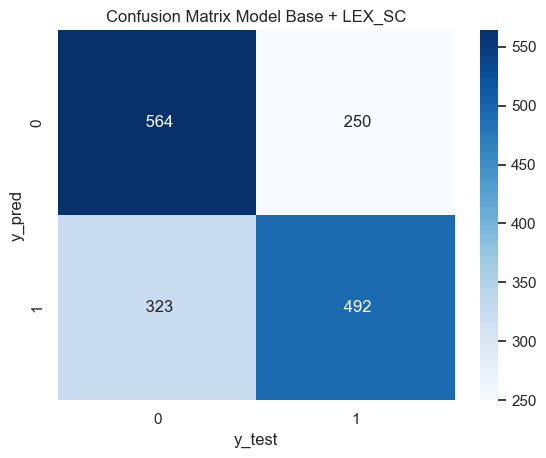

In [84]:
out_cm(cm4,'Confusion Matrix Model Base + LEX_SC')

In [85]:
print(classification_report(y_testnp,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.69      0.66       814
           1       0.66      0.60      0.63       815

    accuracy                           0.65      1629
   macro avg       0.65      0.65      0.65      1629
weighted avg       0.65      0.65      0.65      1629



In [86]:
under_sampling_res.to_csv('undersampling_data_res.csv',index= False)